### James Cooper | CSC 529 | Assignment 2

### Problem 4: 

#### The breast cancer Wisconsin dataset consists of 569 instances and 32 features.  The class variable represents diagnosis (M=malignant, B=benign) and the features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. For the entire description of the dataset and download, use the following link: http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names

#### a. Model the diagnosis using ensemble learning based on bagging (with decision trees as learners) and plot the error rate as a function of the number of trees in the ensemble.  Perform an analysis of your results.

In [1]:
cd "C:/Users/James Cooper/Desktop/DePaul/Advanced Data Mining/Homework2"

C:\Users\James Cooper\Desktop\DePaul\Advanced Data Mining\Homework2


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import accuracy_score

Populating the interactive namespace from numpy and matplotlib


In [17]:
dat4 = pd.read_csv("bcdata_num.csv", sep=',')
dat4.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
data_4 = dat4.drop('diagnosis', 1).values
classes_4 = dat4['diagnosis'].astype('int').values

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import model_selection
from sklearn.metrics import accuracy_score

In [33]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_4, classes_4, test_size = 0.34, random_state = 123)

In [34]:
bg = BaggingClassifier(DecisionTreeClassifier(), n_estimators=30)
bg.fit(X_train, y_train)
predict_bg = bg.predict(X_test)
print predict_bg
print"\n"
print predict_bg - y_test
print "\n"
print accuracy_score(predict_bg, y_test)

[1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1
 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1
 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0
 1 0 1 0 1 1 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 0 1 0 1]


[ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]


0.98453608

In [65]:
from sklearn.metrics import mean_squared_error
random_state = 42
n_jobs = 1  
n_estimators = 100
step_factor = 1
axis_step = int(n_estimators/step_factor)
estimators = np.zeros(axis_step)
bagging_mse_train = np.zeros(axis_step)

In [66]:
for i in range(0, axis_step):
    print("Bagging Estimator: %d of %d..." % (
        step_factor*(i+1), n_estimators)
    )
    bagging = BaggingClassifier(
        DecisionTreeClassifier(),
        n_estimators=step_factor*(i+1),
        random_state=random_state
    )
    bagging.fit(X_train, y_train)
    mse_train = mean_squared_error(y_train, bagging.predict(X_train))
    estimators[i] = step_factor*(i+1)
    bagging_mse_train[i] = mse_train

Bagging Estimator: 1 of 100...
Bagging Estimator: 2 of 100...
Bagging Estimator: 3 of 100...
Bagging Estimator: 4 of 100...
Bagging Estimator: 5 of 100...
Bagging Estimator: 6 of 100...
Bagging Estimator: 7 of 100...
Bagging Estimator: 8 of 100...
Bagging Estimator: 9 of 100...
Bagging Estimator: 10 of 100...
Bagging Estimator: 11 of 100...
Bagging Estimator: 12 of 100...
Bagging Estimator: 13 of 100...
Bagging Estimator: 14 of 100...
Bagging Estimator: 15 of 100...
Bagging Estimator: 16 of 100...
Bagging Estimator: 17 of 100...
Bagging Estimator: 18 of 100...
Bagging Estimator: 19 of 100...
Bagging Estimator: 20 of 100...
Bagging Estimator: 21 of 100...
Bagging Estimator: 22 of 100...
Bagging Estimator: 23 of 100...
Bagging Estimator: 24 of 100...
Bagging Estimator: 25 of 100...
Bagging Estimator: 26 of 100...
Bagging Estimator: 27 of 100...
Bagging Estimator: 28 of 100...
Bagging Estimator: 29 of 100...
Bagging Estimator: 30 of 100...
Bagging Estimator: 31 of 100...
Bagging Estimator

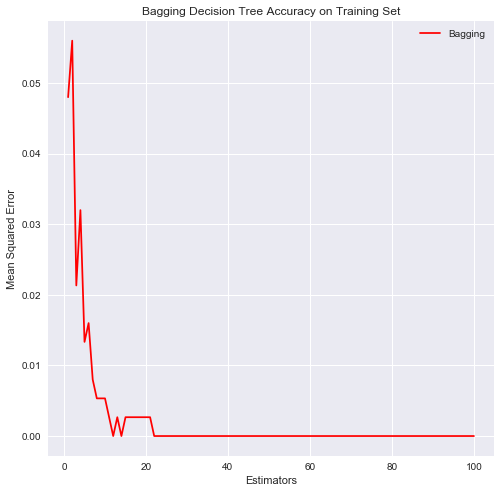

In [60]:
plt.figure(figsize=(8, 8))
plt.title('Bagging Decision Tree Accuracy on Training Set')
plt.plot(estimators, bagging_mse, 'b-', color='red', label='Bagging')
plt.legend(loc='upper right')
plt.xlabel('Estimators')
plt.ylabel('Mean Squared Error')
plt.show()

In [67]:
random_state = 43
axis_step = int(n_estimators/step_factor)
estimators = np.zeros(axis_step)
bagging_mse_test = np.zeros(axis_step)

In [68]:
for i in range(0, axis_step):
    print("Bagging Estimator: %d of %d..." % (
        step_factor*(i+1), n_estimators)
    )
    bagging = BaggingClassifier(
        DecisionTreeClassifier(),
        n_estimators=step_factor*(i+1),
        #n_jobs=n_jobs,
        random_state=random_state
    )
    bagging.fit(X_train, y_train)
    mse_test = mean_squared_error(y_test, bagging.predict(X_test))
    estimators[i] = step_factor*(i+1)
    bagging_mse_test[i] = mse_test

Bagging Estimator: 1 of 100...
Bagging Estimator: 2 of 100...
Bagging Estimator: 3 of 100...
Bagging Estimator: 4 of 100...
Bagging Estimator: 5 of 100...
Bagging Estimator: 6 of 100...
Bagging Estimator: 7 of 100...
Bagging Estimator: 8 of 100...
Bagging Estimator: 9 of 100...
Bagging Estimator: 10 of 100...
Bagging Estimator: 11 of 100...
Bagging Estimator: 12 of 100...
Bagging Estimator: 13 of 100...
Bagging Estimator: 14 of 100...
Bagging Estimator: 15 of 100...
Bagging Estimator: 16 of 100...
Bagging Estimator: 17 of 100...
Bagging Estimator: 18 of 100...
Bagging Estimator: 19 of 100...
Bagging Estimator: 20 of 100...
Bagging Estimator: 21 of 100...
Bagging Estimator: 22 of 100...
Bagging Estimator: 23 of 100...
Bagging Estimator: 24 of 100...
Bagging Estimator: 25 of 100...
Bagging Estimator: 26 of 100...
Bagging Estimator: 27 of 100...
Bagging Estimator: 28 of 100...
Bagging Estimator: 29 of 100...
Bagging Estimator: 30 of 100...
Bagging Estimator: 31 of 100...
Bagging Estimator

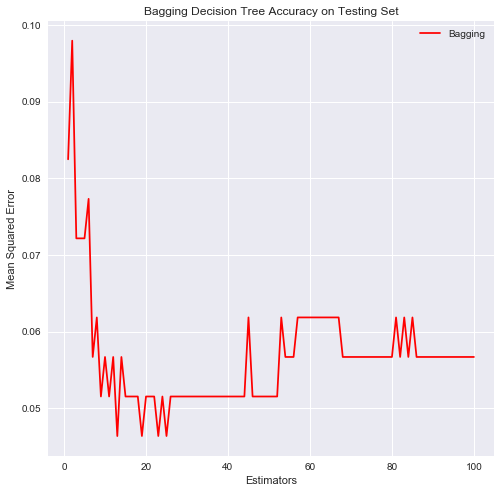

In [70]:
plt.figure(figsize=(8, 8))
plt.title('Bagging Decision Tree Accuracy on Testing Set')
plt.plot(estimators, bagging_mse_test, 'b-', color='red', label='Bagging')
plt.legend(loc='upper right')
plt.xlabel('Estimators')
plt.ylabel('Mean Squared Error')
plt.show()

#### b.	Explain if bagging is an appropriate choice for the proposed ensemble for this particular data.

Yes bagging is definitely an appropriate choice for this algorithm, we can see that the Decision Tree is very unstable. The tree begins with a higher error on both the training and testing sets. Bagging reduces the overall expected error due to the fact that it is combining outputs here and randomly resamples the data. This allows for the algorithm to learn and predict on the data independently and "vote" on the average, best parameters.

#### c. Briefly describe the differences between bagging and boosting.

Bagging creates ensembles of the classifier you are passing to it, so are using a decision tree on some data, bagging will run the x amount of decision trees specified and trains the data by drawing independent samples each time. Bagging then uses the best aggregated model to predict the classes. Boosting goes a step further and adds weights to each model, thereby assigning better weights to better models.